In [3]:
!pip install --upgrade tables
!pip install eli5

     |████████████████████████████████| 4.3MB 2.8MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4
     |████████████████████████████████| 112kB 2.8MB/s 


In [0]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import eli5
from eli5.sklearn import PermutationImportance

import matplotlib.pyplot as plt

def mae(predict,target):
    return (abs(predict-target)).mean()

In [0]:
def group_and_barplot(feat_groupby, feat_agg='price_value', agg_func=[np.mean, np.median, np.size], feat_sort='mean', top=50, subplots=True):
  return (
    df
   .groupby(feat_groupby)[feat_agg]
   .agg(agg_func)
   .sort_values(by=feat_sort, ascending=False)
   .head(top)
   ).plot(kind='bar', figsize=(15,5), subplots=subplots)

# Wczytywanie danych

In [8]:
ls

sample_data/


In [9]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix/"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [18]:
pwd

'/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car'

In [20]:
ls data/

car.h5


In [35]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

## Dummy Model

In [36]:
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

In [37]:
X = df [['car_id']].values
y = df['price_value'].values

model = DummyRegressor()
model.fit(X, y)

y_pred = model.predict(X)
mae(y, y_pred)

39465.934630440985

In [26]:
[x for x in df.columns if 'price' in x]

['price_currency', 'price_details', 'price_value']

In [28]:
df['price_currency'].value_counts()

PLN    106290
EUR       204
Name: price_currency, dtype: int64

In [38]:
df = df[ df['price_currency'] != 'EUR' ]
df.shape

(106290, 155)

## Features

In [0]:
SUFFIX_CAT = '__cat'
for feat in df.columns:
  if type(df[feat][0]) is list: continue
  if SUFFIX_CAT in feat: continue
  df[feat + SUFFIX_CAT] = df[feat].factorize()[0]

In [41]:
count = 0
for item in df.columns:
  if SUFFIX_CAT in item:
    count += 1
    #print(item)

print(count)

154


In [0]:
cat_feats = [x for x in df.columns if SUFFIX_CAT in x]

In [45]:
len(cat_feats)

154

In [46]:
cat_feats = [x for x in cat_feats if 'price' not in x ]
len(cat_feats)

151

In [48]:
X = df[cat_feats ].values
y = df['price_value'].values

model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores)

-19566.588937368328

In [51]:
m = DecisionTreeRegressor(max_depth=5)
m.fit(X, y)

imp = PermutationImportance(m, random_state=0).fit(X, y)
eli5.show_weights(imp, feature_names=cat_feats)

Weight,Feature
0.2533 ± 0.0040,param_napęd__cat
0.2008 ± 0.0047,param_faktura-vat__cat
0.1943 ± 0.0088,param_stan__cat
0.1423 ± 0.0086,param_rok-produkcji__cat
0.0629 ± 0.0047,param_moc__cat
0.0424 ± 0.0014,feature_kamera-cofania__cat
0.0412 ± 0.0008,param_skrzynia-biegów__cat
0.0286 ± 0.0037,param_marka-pojazdu__cat
0.0191 ± 0.0022,param_pojemność-skokowa__cat
0.0163 ± 0.0005,feature_bluetooth__cat


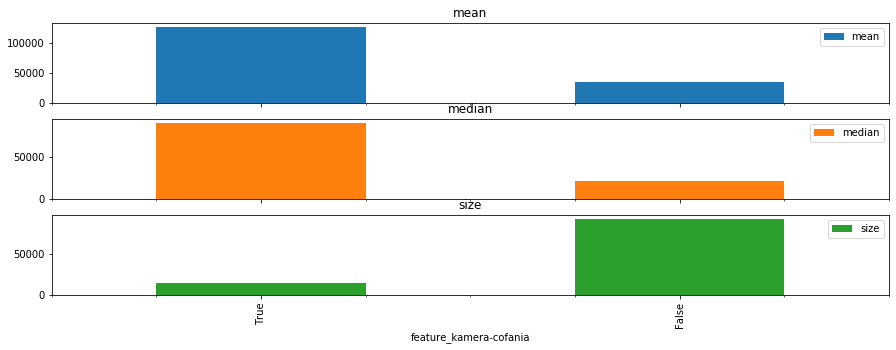

In [54]:
group_and_barplot('feature_kamera-cofania', feat_sort='mean');